<a href="https://colab.research.google.com/github/ducbao811/diveintocode-ml/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1 to 5]

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

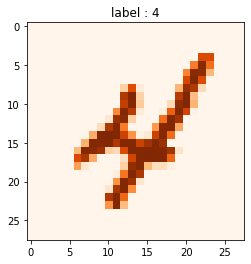

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
index = 9
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'Oranges')
plt.title('label : {}'.format(y_train[index]))
plt.show()

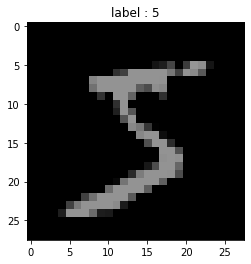

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [5]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # Convert to float type
image -= 105.35 # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray',vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

In [6]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [8]:
# Splitting data for training and validation
from sklearn.model_selection import train_test_split
X_training, X_val, y_training, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_training.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)
print(y_training.shape)

(48000, 784)
(12000, 784)
(48000, 10)


In [25]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    Simple three-layer neural network classifier
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, verbose = False, bias = True, lr =0.01, n_nodes1 = 400, n_nodes2 = 200, n_output = 10, sigma = 0.02, activate_func = "tanh"):
        self.verbose = verbose
        self.has_bias = bias
        self.lr = lr
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.activate_func = activate_func
        self.batch_size = 20
        self.epoch = 10
        self.sigma = sigma

    def init_weight_value(self, n_features):
        """
        Initialize weights for each layer of the network
        """
        self.W1 = self.sigma * np.random.randn(n_features, self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        if self.has_bias:
          self.b1 = self.sigma * np.random.rand(1,self.n_nodes1)
          self.b2 = self.sigma * np.random.rand(1,self.n_nodes2)
          self.b3 = self.sigma * np.random.rand(1,self.n_output)
        else:
          self.b1 = self.sigma * np.zeros(self.n_nodes1)
          self.b2 = self.sigma * np.zeros(self.n_nodes2)
          self.b3 = self.sigma * np.zeros(self.n_output)


    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        self.training_loss = []
        self.testing_loss = []

        self.init_weight_value(784)

        for i in range (self.epoch):
          get_mini_batch = GetMiniBatch(X,y,batch_size=20)
          for mini_X_train, mini_y_train in get_mini_batch:
              self.forward_propagation(mini_X_train)
              self.backward_propagation(mini_X_train, mini_y_train)
          self.forward_propagation(X)
          self.training_loss.append(self._cross_entropy(y,self.Z3))
          if X_val is not None:
            self.forward_propagation(X_val)
            self.testing_loss.append(self._cross_entropy(y_val,self.Z3))
          
          if self.verbose:
            print("Epoch {}, training_loss: {}".format(i,self.training_loss[-1]))

    def forward_propagation(self, X):
        """
        Implement forward propagation when training neural network
        """
        self.A1 = X @ self.W1 + self.b1
        self.Z1 = self._activate_function(self.A1)
        self.A2 = self.A1 @ self.W2 + self.b2
        self.Z2 = self._activate_function(self.A2)
        self.A3 = self.A2 @ self.W3 + self.b3
        self.Z3 = self._soft_max(self.A3)

    def backward_propagation(self, X, y):
        """
        Implement backward propagation with gradient descent
        """
        # Third layer update
        dA3 = (self.Z3 - y) / len(y)
        self.W3 -= self.lr *  (self.Z2.T @ dA3) 
        self.b3 -= self.lr * np.sum(dA3,axis=0)
        dZ2 = dA3 @ self.W3.T

        # Second layer update
        dA2 = dZ2 * (1 - np.tanh(self.A2)**2)
        self.W2 -= self.lr * (self.Z1.T @ dA2) 
        self.b2 -= self.lr * np.sum(dA2,axis=0)
        dZ1 = dA2 @ self.W2.T

        # First layer update
        dA1 = dZ1 * (1 - np.tanh(self.A1)**2)
        self.W1 -= self.lr * (X.T @ dA1) 
        self.b1 -= self.lr * np.sum(dA1,axis=0) 


    def _cross_entropy(self, y, Z):
        return -np.sum(y*np.log(Z)) / len(y)

    def _activate_function(self, X):
        """
        Output result after applying activation function on X
        """
        if self.activate_func == "tanh":
          return np.tanh(X)
        else:
          return 1 / (1 + np.exp(X)) 

    def _soft_max(self,X):
        return np.exp(X) / np.sum(np.exp(X),axis=1).reshape(-1,1)

    def predict(self, X):
        """
        Estimate using a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        self.forward_propagation(X)
        return np.argmax(self.Z3,axis=1)

In [26]:
class GetMiniBatch:
    """
Iterator to get a mini-batch
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


# [Problem 6]

In [27]:
model = ScratchSimpleNeuralNetrowkClassifier(verbose=True)
model.fit(X_training,y_training, X_val, y_val)

Epoch 0, training_loss: 0.432495874709299
Epoch 1, training_loss: 0.3431581023060989
Epoch 2, training_loss: 0.3151334716234794
Epoch 3, training_loss: 0.30131668706548376
Epoch 4, training_loss: 0.29421323193650023
Epoch 5, training_loss: 0.2911868402921345
Epoch 6, training_loss: 0.29125288727919263
Epoch 7, training_loss: 0.29392573877622513
Epoch 8, training_loss: 0.2987167767884872
Epoch 9, training_loss: 0.30471757152849044


Accuracy score of the model on training set and testing set

In [30]:
from sklearn.metrics import accuracy_score
training_pred = model.predict(X=X_train)
test_pred = model.predict(X=X_test)
print("Accuracy score for training set: {}".format(accuracy_score(y_true=y_train, y_pred=training_pred)))
print("Accuracy score for testing set: {}".format(accuracy_score(y_true=y_test,y_pred=test_pred)))

Accuracy score for training set: 0.9216
Accuracy score for testing set: 0.9225


# [Problem 7]

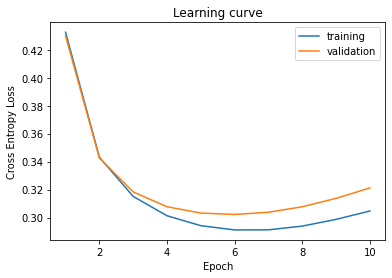

In [36]:
# Plotting learning curve
import matplotlib.pyplot as plt
  
plt.plot(range(1,model.epoch+1),model.training_loss, label="training")
plt.plot(range(1,model.epoch+1),model.testing_loss, label="validation")

plt.xlabel('Epoch')

plt.ylabel('Cross Entropy Loss')
  
plt.legend()
plt.title('Learning curve')
  
plt.show()

# [Problem 8]

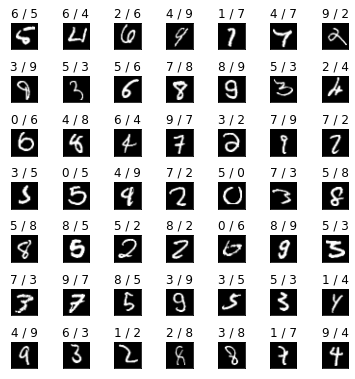

In [44]:
"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".
Parameters:
----------
y_pred : Estimated ndarray (n_samples,)
y_val : Correct label of verification data (n_samples,)
X_val : Verification data features (n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num =  49# How many to display

true_false = test_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(7, 7, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(test_pred[false_list[i]],y_test[false_list[i]]))
    ax.imshow(X_test.reshape(-1,28,28)[false_list[i]], cmap='gray')

Some of the misclassified samples have both the predicted labels and correct labels bearing some similarities in the shape. That may be tricky for the model to make the decision.